In [2]:
import numpy as np  # 导入 numpy包
from scipy.integrate import odeint, solve_ivp  # 导入 scipy.integrate 模块
from sympy import *

## 使用符号解求解微分方程
python的符号解sympy工具包可以求解微分方程符号解

符号计算以符号的方式处理数学对象的计算。这意味着数学对象是精确表示的，而不是近似表示的，带有未赋值变量的数学表达式是以符号形式保留的。

In [2]:
## eg.1.

y = symbols('y', cls=Function)
x = symbols('x')
eq = Eq(y(x).diff(x, 2) + 2 * y(x).diff(x, 1) + y(x), x * x)
## y''+4y'+29y=0
print(dsolve(eq, y(x)))

Eq(y(x), x**2 - 4*x + (C1 + C2*x)*exp(-x) + 6)


In [3]:
init_session()

IPython console for SymPy 1.10.1 (Python 3.7.6-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.10.1/



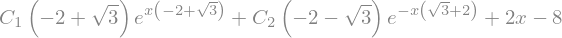

In [4]:
C1, C2 = symbols('C1 C2')
y = symbols('y', cls=Function)
x = symbols('x')
y = C1 * exp(x * (-2 + sqrt(3))) + C2 * exp(-x * (sqrt(3) + 2)) + x ** 2 - 8 * x + 30
y.diff(x, 1)

In [7]:
# eg.2.
t = symbols('t')
x1, x2, x3 = symbols('x1,x2,x3', cls=Function)
eq = [x1(t).diff(t) - 2 * x1(t) + 3 * x2(t) - 3 * x3(t),
      x2(t).diff(t) - 4 * x1(t) + 5 * x2(t) - 3 * x3(t),
      x3(t).diff(t) - 4 * x1(t) + 4 * x2(t) - 2 * x3(t)]
con = {x1(0): 1, x2(0): 2, x3(0): 3}
s = dsolve(eq, ics=con)
print(s)


[Eq(x1(t), 2*exp(2*t) - exp(-t)), Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)), Eq(x3(t), 2*exp(2*t) + exp(-2*t))]


In [8]:
x = Matrix([x1(t), x2(t), x3(t)])
A = Matrix([[2, -3, 3], [4, -5, 3], [4, -4, 2]])
eq = x.diff(t) - A * x
s = dsolve(eq, ics={x1(0): 1, x2(0): 2, x3(0): 3})
print(s)


[Eq(x1(t), 2*exp(2*t) - exp(-t)), Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)), Eq(x3(t), 2*exp(2*t) + exp(-2*t))]


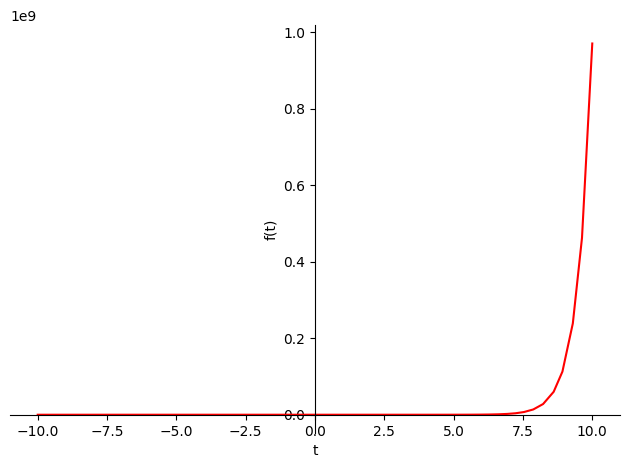

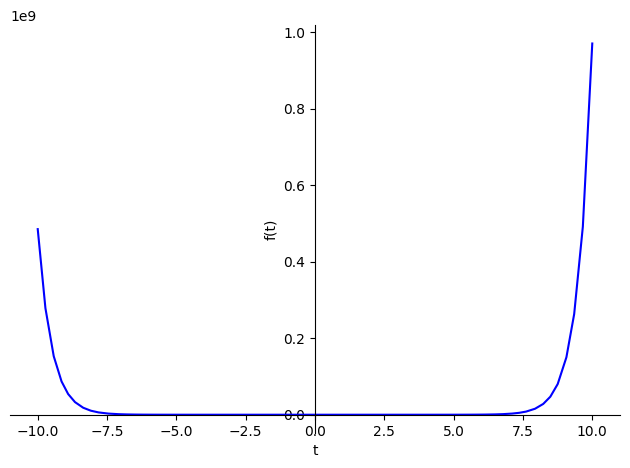

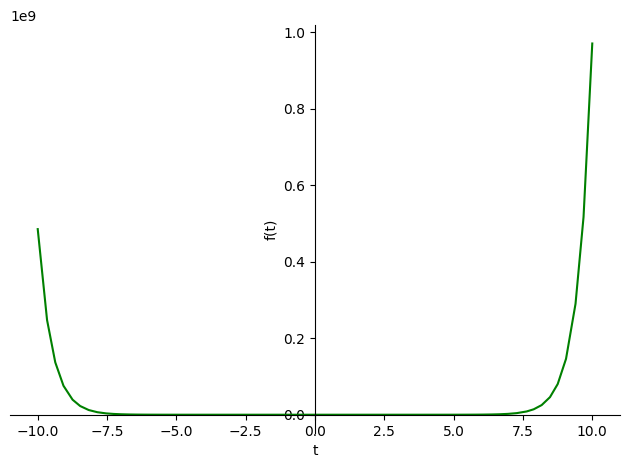

In [1]:

from sympy import *

t = Symbol('t')
plot(2 * exp(2 * t) - exp(-t), line_color='red')
plot(2 * exp(2 * t) - exp(-t) + exp(-2 * t), line_color='blue')
plot(2 * exp(2 * t) + exp(-2 * t), line_color='green')

## 使用数值解求微分方程
对于数值求解，我们一般通过scipy当中的方法来实现。包括odeint和solve_ivp等方法

x=[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4]
对应的数值解y=[[0.         0.09900996 0.19230775 0.2752294  0.34482762 0.40000004
  0.44117651 0.46979872 0.48780495 0.49723764 0.50000005 0.49773759
  0.49180331 0.48327139 0.47297298 0.46153847 0.44943821 0.437018
  0.42452831 0.41214752 0.40000002 0.38817007 0.37671235 0.3656598
  0.35502961 0.34482761 0.33505157 0.32569362 0.31674209 0.30818279
  0.30000001 0.2921772  0.28469751 0.27754416 0.27070064 0.26415095
  0.25787966 0.25187202 0.24611399 0.24059223 0.235

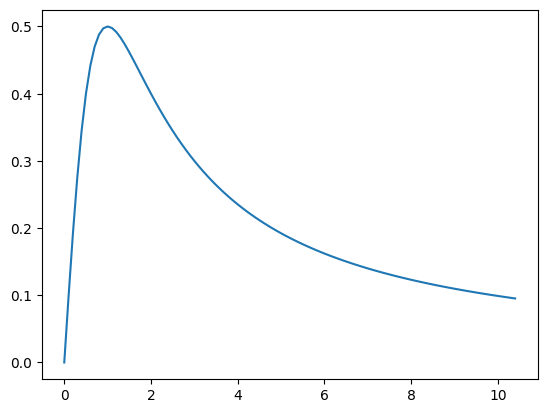

In [3]:
# eg.3.
import matplotlib.pyplot as plt

dy = lambda y, x: 1 / (1 + x ** 2) - 2 * y ** 2  # y'=1/(1+x^2)-2y^2
'''
def dy(y,x):
    return 1/(1+x**2)-2*y**2
'''
x = np.arange(0, 10.5, 0.1)  #从0开始，每次增加0.1，到10.5为止（取不到10.5）
sol = odeint(dy, 0, x)  # odeint输入：微分方程dy，y的首项（y(0)等于多少），自变量列表
print("x={}\n对应的数值解y={}".format(x, sol.T))
plt.plot(x, sol)
plt.show()

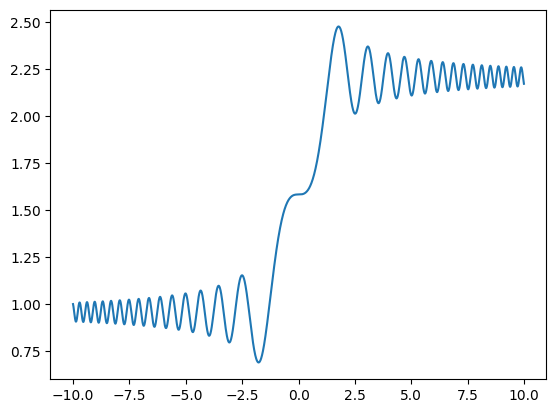

In [4]:
# eg.4.
def dy_dt(y, t):
    return np.sin(t ** 2)


y0 = [1]
t = np.arange(-10, 10, 0.01)
y = odeint(dy_dt, y0, t)
plt.plot(t, y)
plt.show()

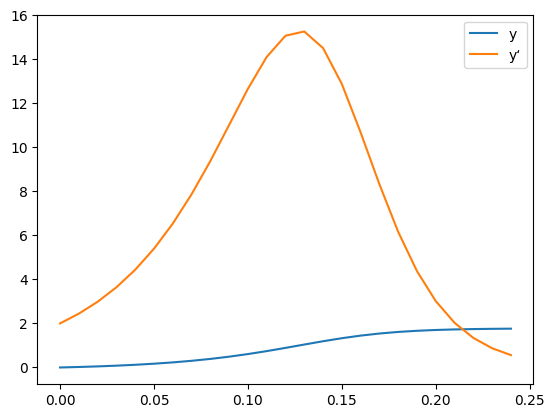

In [5]:
# eg.5. 
from scipy import linspace, exp


# odeint是通过把二阶微分转化为一个方程组的形式求解高阶方程的
# y''=20(1-y^2)y'-y
def fvdp(y, t):
    '''
    要把y看出一个向量，y = [dy0,dy1,dy2,...]分别表示y的n阶导，那么
    y[0]就是需要求解的函数，y[1]表示一阶导，y[2]表示二阶导，以此类推
    '''
    dy1 = y[1]  # y[1]=dy/dt，一阶导                     y[0]表示原函数
    dy2 = 20 * (1 - y[0] ** 2) * y[1] - y[0]  # y[1]表示一阶微分
    # y[0]是最初始，也就是需要求解的函数
    # 注意返回的顺序是[一阶导， 二阶导]，这就形成了一阶微分方程组
    return [dy1, dy2]


# 求解的是一个二阶微分方程，所以输入的时候同时输入原函数y和微分y'
# y[0]表示原函数， y[1]表示一阶微分
# dy1表示一阶微分， dy2表示的是二阶微分
# 可以发现，dy1和y[1]表示的是同一个东西
# 把y''分离变量分离出来： dy2=20*(1-y[0]**2)*y[1]-y[0]
def solve_second_order_ode():
    '''
    求解二阶ODE
    '''
    x = np.arange(0, 0.25, 0.01)  #给x规定范围
    y0 = [0.0, 2.0]  # 初值条件
    # 初值[3.0, -5.0]表示y(0)=3,y'(0)=-5
    # 返回y，其中y[:,0]是y[0]的值，就是最终解，y[:,1]是y'(x)的值
    y = odeint(fvdp, y0, x)

    y1, = plt.plot(x, y[:, 0], label='y')
    y1_1, = plt.plot(x, y[:, 1], label='y‘')
    plt.legend(handles=[y1, y1_1])  #创建图例

    plt.show()


solve_second_order_ode()

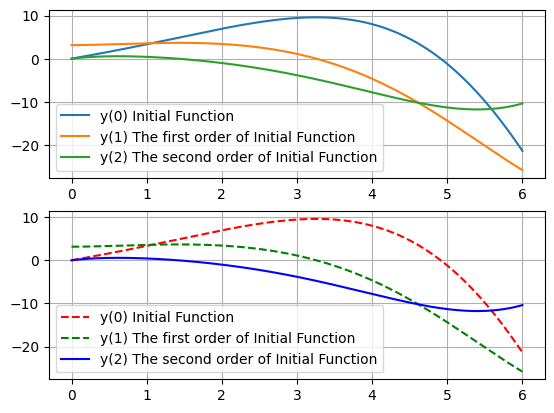

In [6]:
# eg.6.
def f(t, y):
    dy1 = y[1]
    dy2 = y[2]
    dy3 = -y[0] + dy1 - dy2 - np.cos(t)
    return [dy1, dy2, dy3]


def solve_high_order_ode():
    '''
    求解高阶ODE
    '''
    t = np.linspace(0, 6, 1000)
    tspan = (0.0, 6.0)
    y0 = [0.0, pi, 0.0]
    # 初值[0,1，0]表示y(0)=0,y'(0)=1，y''(0)=0
    # 返回y， 其中y[:,0]是y[0]的值 ，就是最终解 ，y[:,1]是y'(x)的值
    y = odeint(f, y0, t)
    y_ = solve_ivp(f, t_span=tspan, y0=y0, t_eval=t)
    plt.subplot(211)
    l1, = plt.plot(t, y[:, 0], label='y(0) Initial Function')
    l2, = plt.plot(t, y[:, 1], label='y(1) The first order of Initial Function')
    l3, = plt.plot(t, y[:, 2], label='y(2) The second order of Initial Function')
    plt.legend(handles=[l1, l2, l3])
    plt.grid('on')
    plt.subplot(212)
    l4, = plt.plot(y_.t, y_.y[0, :], 'r--', label='y(0) Initial Function')
    l5, = plt.plot(y_.t, y_.y[1, :], 'g--', label='y(1) The first order of Initial Function')
    l6, = plt.plot(y_.t, y_.y[2, :], 'b-', label='y(2) The second order of Initial Function')
    plt.legend(handles=[l4, l5, l6])  # 显示图例
    plt.grid('on')
    plt.show()


solve_high_order_ode()


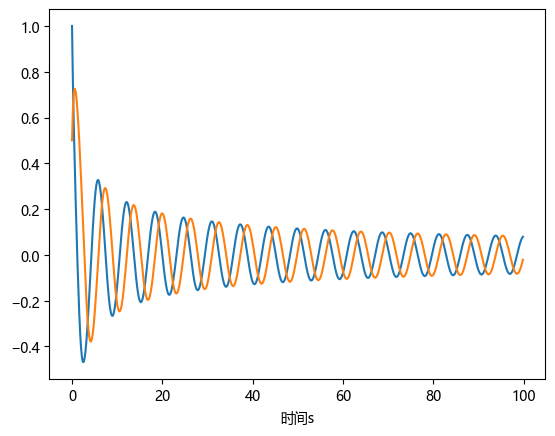

In [7]:
# eg.7.
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']


# x(t),y(t), x'=-x^3-y,y'=-y^3+x

def fun(t, w):
    x = w[0]
    y = w[1]
    return [-x ** 3 - y, -y ** 3 + x]


# 初始条件
y0 = [1, 0.5]
yy = solve_ivp(fun, (0, 100), y0, method='RK45', t_eval=np.arange(0, 100, 0.2))
t = yy.t
data = yy.y
plt.plot(t, data[0, :])
plt.plot(t, data[1, :])
plt.xlabel("时间s")
plt.show()

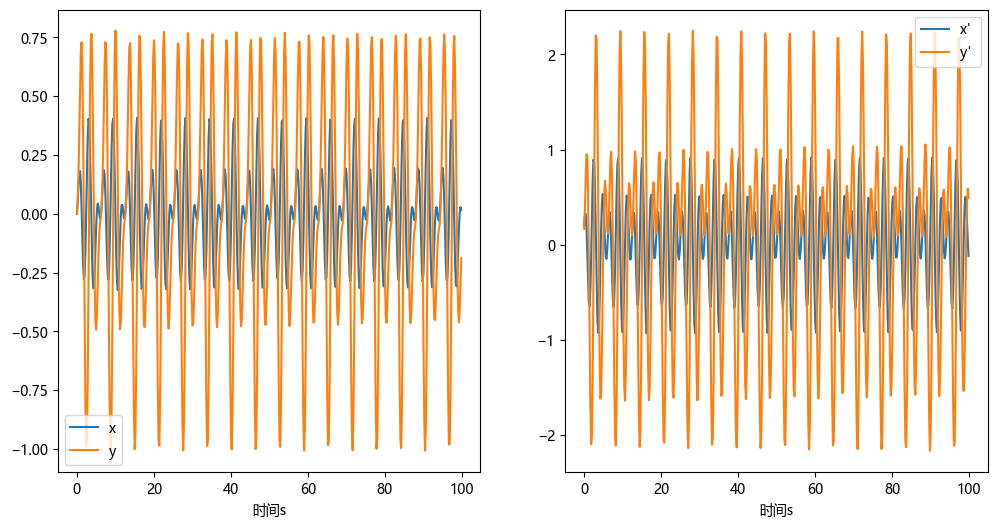

In [8]:
def fun(t, w):
    x = w[0]
    y = w[1]
    dx = w[2]
    dy = w[3]
    # 求导以后[x,y,dx,dy]变为[dx,dy,d2x,d2y]
    # d2x为w[2]，d2y为w[5]
    return [dx, dy, -dy - 3 * x + np.cos(2 * t), 4 * dx - 3 * y + np.sin(2 * t)]


# 初始条件
y0 = [0, 0, 1 / 5, 1 / 6]
yy = solve_ivp(fun, (0, 100), y0, method='RK45', t_eval=np.arange(0, 100, 0.2))
t = yy.t
data = yy.y
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(t, data[0, :])
plt.plot(t, data[1, :])
plt.legend(['x', 'y'])
plt.xlabel("时间s")
plt.subplot(1, 2, 2)
plt.plot(t, data[2, :])
plt.plot(t, data[3, :])
plt.legend(["x' ", "y' "])
plt.xlabel("时间s")
plt.show()

e:\anaconda\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  app.launch_new_instance()


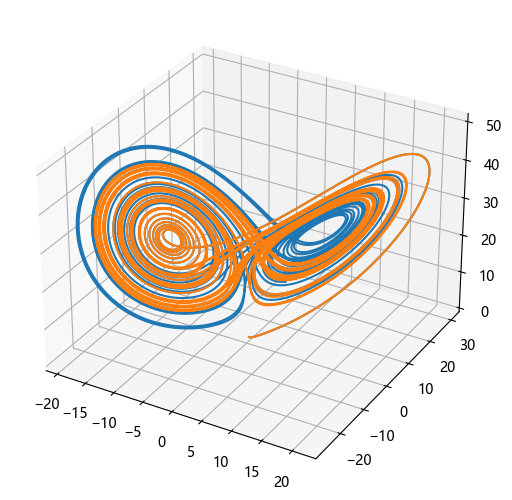

In [9]:
# eg.9.
import numpy as np
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def dmove(Point, t, sets):
    p, r, b = sets
    x, y, z = Point
    return np.array([p * (y - x), x * (r - z), x * y - b * z])


t = np.arange(0, 30, 0.001)
P1 = odeint(dmove, (0., 1., 0.), t, args=([10., 28., 3.],))
P2 = odeint(dmove, (0., 1.01, 0.), t, args=([10., 28., 3.],))
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(P1[:, 0], P1[:, 1], P1[:, 2])
ax.plot(P2[:, 0], P2[:, 1], P2[:, 2])
plt.show()